# My Data Set

#### My datset is about predicting heart stroke. It has 12 columns and 5111 rows. It has different medical conditions which can relate to heart stroke.
#### I wil do some analysis to figure out main reason of heart stroke and correlation between them.
##### Source of data: https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5/data"

# My Questions are
#### Q1-  Who have more number of strokes among men and women?
#### Q2- What could be the main reasons of heart stroke?
#### Q-3 What is the correlation between Stroke & other factors?
#### Q-4 What age group has more number of Stroke?
#### Q-5 What is the max age of people who have heart stroke?

# My Hypothesis

#### My hypothesis is that people who smoke more are more prone to have heart stroke.

In [1]:
import pandas as pd   # I am using pandas library to work on csv file
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./python,VS/healthcare-dataset-stroke-data.csv')  # here i gave variable to my file df to my file and i used red_csv from pandas to read csv file

df = df[df['gender'].isin(['Male', 'Female'])]  # i have only 1 value for other in gender column so i choose only male and female values to work with
df.head() #it will show how many rows you want to see. 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Cleaning Data

In [2]:
df.info() # Here is the data detail. type of data, null and no null values columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [3]:
df["smoking_status"].drop_duplicates() # Checking what values i have in my smoking_status column so i am using .drop_duplicate method for avoiding repitation of values


0    formerly smoked
1       never smoked
3             smokes
8            Unknown
Name: smoking_status, dtype: object

#### One of the potential issues i discovered is the smoking status being unknown is not clear. To my knowledge person either smokes or does not smokes. I am assuming that under unknow person does not smoke.

In [4]:
value_conversion = {'formerly smoked': 1, 'never smoked': 0, 'smokes': 1, 'Unknown':0} # i am converting my values into number value so i can easily calculate them later
df['smoking_status'] = df['smoking_status'].map(value_conversion)  #i am using .map() method to apply my change on smoking_status column

df.head(5111)   #checking rows again to see the change i made.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,1,0


In [5]:
df["Residence_type"].drop_duplicates() # here i am checking values in my Residence_type column. Another item i want to see is residence type for further analysis.

0    Urban
1    Rural
Name: Residence_type, dtype: object

In [6]:
urban_res = {'Urban':1} # i am giving number to my values for calculation purpose. Also i am giving these values a new variable for creating new columns
rural_res = {'Rural':1}

df["Urban"] = df['Residence_type'].map(urban_res)   #Adding new column to my data
df["Rural"] = df['Residence_type'].map(rural_res)   #Adding new column to my data

df.head() #printing rows agin to check the success of my change

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,1.0,NaN
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1,NaN,1.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1,NaN,1.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,1,1.0,NaN
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1,NaN,1.0


In [7]:
df.fillna({'Urban': 0, 'Rural': 0}, inplace=True) # Its changing NaN value to 0 in Urban & Rural columns

In [8]:
df.head(5111) # printing all data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,1.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1,0.0,1.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1,0.0,1.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,1,1.0,0.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0,0,1.0,0.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,0,1.0,0.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,0,0.0,1.0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,1,0,0.0,1.0


In [9]:
df.drop(columns=['Residence_type'], inplace=True) # Change is successful so deleting old column now. 

In [10]:
df.head(5111)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Rural
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,1,1,1.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,0,1,0.0,1.0
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,0,1,0.0,1.0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,1,1,1.0,0.0
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,83.75,NaN,0,0,1.0,0.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,0,0,1.0,0.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,0,0,0.0,1.0
5108,37544,Male,51.0,0,0,Yes,Private,166.29,25.6,1,0,0.0,1.0


In [11]:
value_conversion = {'Private': 1, 'Self-employed': 1, 'Govt_job': 1, 'Never_worked':0, 'children':0} #  I gave 1 value to thise who are woking and 0 for those who are not working. i am converting my values into number value so i can easily calculate them later
df['work_type'] = df['work_type'].map(value_conversion)


## Cleaned Data

In [12]:
df.head(5111)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Rural
0,9046,Male,67.0,0,1,Yes,1,228.69,36.6,1,1,1.0,0.0
1,51676,Female,61.0,0,0,Yes,1,202.21,NaN,0,1,0.0,1.0
2,31112,Male,80.0,0,1,Yes,1,105.92,32.5,0,1,0.0,1.0
3,60182,Female,49.0,0,0,Yes,1,171.23,34.4,1,1,1.0,0.0
4,1665,Female,79.0,1,0,Yes,1,174.12,24.0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,1,83.75,NaN,0,0,1.0,0.0
5106,44873,Female,81.0,0,0,Yes,1,125.20,40.0,0,0,1.0,0.0
5107,19723,Female,35.0,0,0,Yes,1,82.99,30.6,0,0,0.0,1.0
5108,37544,Male,51.0,0,0,Yes,1,166.29,25.6,1,0,0.0,1.0


 ### Total Number Of Female & Male

### How many total number of male & female we have in our data set?
We have 2994 females & 2115 men in our dataset

In [13]:
df.groupby('gender').size() # I am using this funtion to see total number of male and female group by gender

gender
Female    2994
Male      2115
dtype: int64

# Q1-  Who have more number of strokes among men and women?

#### Our analysis are showing that we don't have a big difference in our numbers between men & women who have been suffered by heart stroke. But according to this analysis men have suffered more with heart stroke then women.

In [14]:
df.groupby("gender").mean()['stroke']  # Here i am using groupby for gender & mean for taking out average of stroke between men & women


gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64

# Q2- What could be the main reasons of heart stroke.

#### 1 = Stroke & 0 = No Stroke

#### We have many factor which could lead to heart  stroke. Here I took out averages of all the factors which can be the major cause of stroke. After this analysis age is one of the significant reason to have a heart stroke. People are in their 80s are more in numbers who have heart stroke.

# Age?

#### According to the result of analysis 67% people suffered from heart stroke. Which is showing that age played a significant role.

In [15]:
df.groupby('stroke').mean()['age'] # # Here we are getting average of age and grouping by stroke to get the results

stroke
0    41.974831
1    67.728193
Name: age, dtype: float64

In [16]:
df.drop(columns = ['id'], inplace=True) # id field was dropped as it had no significant reason for the anlaysis


<AxesSubplot:xlabel='stroke', ylabel='age'>

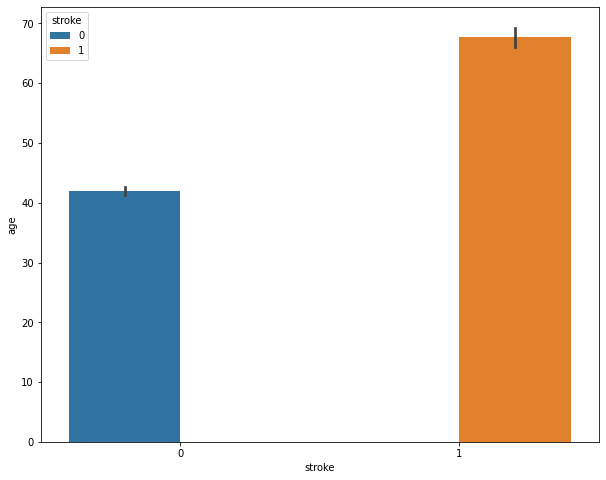

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) # its for increasing figure size
sns.barplot(data=df,x = 'stroke',y= 'age', hue = 'stroke' ) # I am creating a barplot to visualize my analysis


# Smoking?

#### Our analysis shows that 44% are smokers who had heart stroke. So smoking could be or could not be the reason of heart stroke.

In [18]:
df.groupby('stroke').mean()['smoking_status'] # Here we are getting average of smoking_status and grouping by stroke to get the results

stroke
0    0.321193
1    0.449799
Name: smoking_status, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

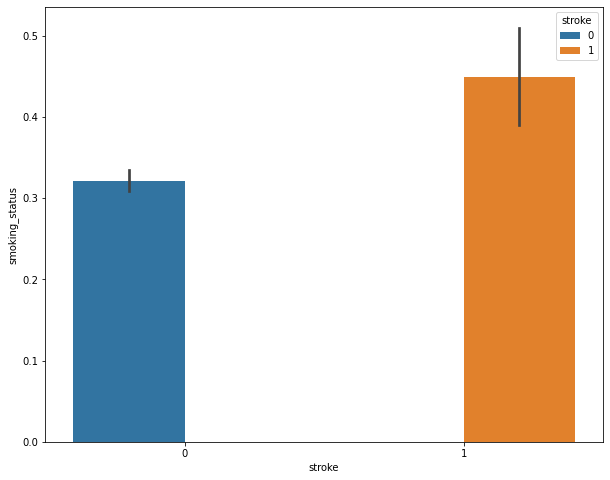

In [19]:
plt.figure(figsize=(10,8)) # its 15" by 8 "
sns.barplot(data=df,x = 'stroke',y= 'smoking_status', hue = 'stroke' ) # I am creating a barplot to visualize my analysis

# Hypertention?

#### Hypertension is also showing some connection with the heart stroke as 26% of people have hypertension who had stroke.

In [20]:
df.groupby('stroke').mean()['hypertension'] # Here we are getting average of hypertention and grouping by stroke to get the results

stroke
0    0.088889
1    0.265060
Name: hypertension, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

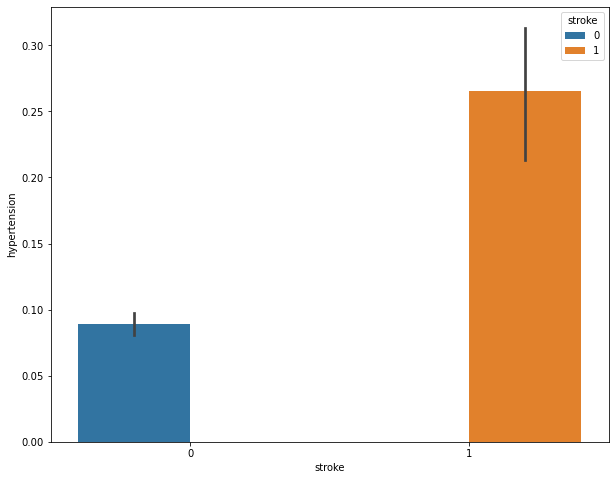

In [21]:
plt.figure(figsize=(10,8)) # its for increasing figure size
sns.barplot(data=df,x = 'stroke',y= 'hypertension', hue = 'stroke') # I am creating a barplot to visualize my analysis

# Heart Disease

#### According to this analysis it looks like heart disease could play a role in heart stroke but its not necessary that it is one of the main cause of it.

In [22]:
df.groupby('stroke').mean()['heart_disease'] # Here we are getting average of heart_disease and grouping by stroke to get the results

stroke
0    0.047119
1    0.188755
Name: heart_disease, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

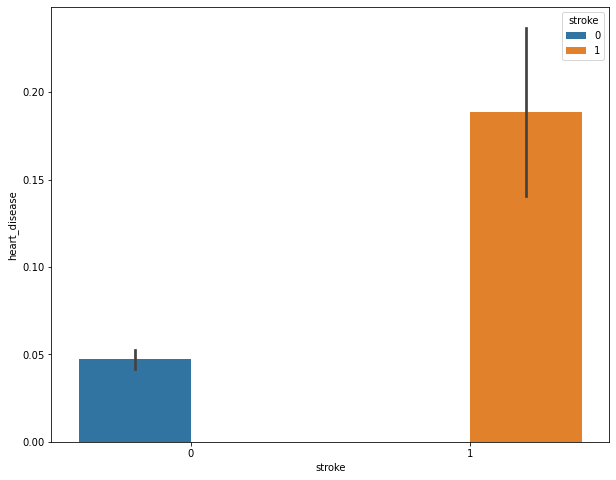

In [23]:
plt.figure(figsize=(10,8)) # its for increasing figure size
sns.barplot(data=df,x = 'stroke',y= 'heart_disease', hue = 'stroke' ) # I am creating a barplot to visualize my analysis 

# Glucose_level

#### According to this analysis it looks like glucose level have is also effecting heart stroke condition but difference is not too much.

In [24]:
df.groupby('stroke').mean()['avg_glucose_level'] # Here we are getting average of avg_glucose and grouping by stroke to get the results

stroke
0    104.787584
1    132.544739
Name: avg_glucose_level, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

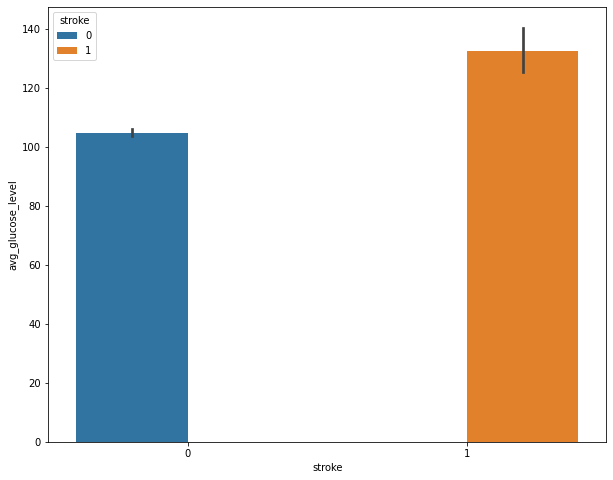

In [25]:
plt.figure(figsize=(10,8)) # its for increasing figure size
sns.barplot(data=df,x = 'stroke',y= 'avg_glucose_level', hue = 'stroke' ) # I am creating a barplot to visualize my analysis 

# Body Mass Index (BMI)

#### BMI does not play much role to because a major cause of heart stroke.

In [26]:
df.groupby('stroke').mean()['bmi'] # Here we are getting average of bmi(body mass index) and grouping by stroke to get the results

stroke
0    28.824431
1    30.471292
Name: bmi, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

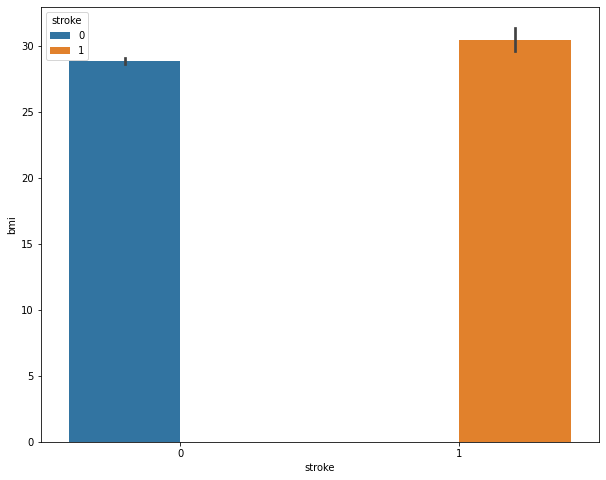

In [27]:
plt.figure(figsize=(10,8)) # its for increasing figure size
sns.barplot(data=df,x = 'stroke',y= 'bmi', hue = 'stroke' ) # I am creating a barplot to visualize my analysis 

# Q-3 What is the correlation between Stroke & other factors?

#### When i check the correlation between all the factors. It show that age has a the strongest correlation with the stroke then other factors. And if we see other factors as wll then age has the strongest correlation with them as well. So age is the main factor who has strongest impact on these factors.

In [28]:
import statsmodels.api as sm #importing this library to see correlation

df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke','Urban', 'Rural']].corr() # i am adding only those columns who can impact on heart stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Urban,Rural
age,1.000000,0.276367,0.263777,0.238323,0.333314,0.247585,0.245239,0.014031,-0.014031
hypertension,0.276367,1.000000,0.108292,0.174540,0.167770,0.071610,0.127891,-0.007980,0.007980
heart_disease,0.263777,0.108292,1.000000,0.161907,0.041322,0.087861,0.134905,0.003045,-0.003045
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.175672,0.068289,0.131991,-0.004783,0.004783
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.154130,0.042341,-0.000293,0.000293
smoking_status,0.247585,0.071610,0.087861,0.068289,0.154130,1.000000,0.059007,0.027457,-0.027457
stroke,0.245239,0.127891,0.134905,0.131991,0.042341,0.059007,1.000000,0.015415,-0.015415
Urban,0.014031,-0.007980,0.003045,-0.004783,-0.000293,0.027457,0.015415,1.000000,-1.000000
Rural,-0.014031,0.007980,-0.003045,0.004783,0.000293,-0.027457,-0.015415,-1.000000,1.000000


## Total count,mean, std grouped by gender.

In [29]:
df.groupby('gender').describe() # Here i check some stats of my data

age                                                      \
         count       mean        std   min   25%   50%   75%   max   
gender                                                               
Female  2994.0  43.757395  21.966561  0.08  27.0  44.0  61.0  82.0   
Male    2115.0  42.483385  23.484066  0.08  22.0  46.0  61.0  82.0   

       hypertension            ... Urban        Rural                      \
              count      mean  ...   75%  max   count      mean       std   
gender                         ...                                          
Female       2994.0  0.092184  ...   1.0  1.0  2994.0  0.489312  0.499969   
Male         2115.0  0.104965  ...   1.0  1.0  2115.0  0.495508  0.500098   

                                 
        min  25%  50%  75%  max  
gender                           
Female  0.0  0.0  0.0  1.0  1.0  
Male    0.0  0.0  0.0  1.0  1.0  

[2 rows x 80 columns]

# Q-4 What age group has more number of Stroke?

#### Heart stroke mostly happened in seniors. 
- The total number of **youth** is **2**
- The total number of **adults** is **91**
- The total number of **senior** is **156**

In [30]:
Youth = 0
Adult = 0
Senior = 0

for i in df.index:  # With this for loop i am geting age from each row and putting them into three categories.
    if (df.loc[i,'age'] <= 18) and df.loc[i,'stroke']==1:    # iI have use loc to locate position of my required argument
        Youth+=1 # with this counter methos each time it will find one it will add in youth
    elif (df.loc[i,'age'] <= 65) and df.loc[i,'stroke']==1: # i use elif for other categories
        Adult+=1
    elif (df.loc[i,'age'] > 65) and df.loc[i,'stroke']==1:
        Senior+=1
        
print(f'The total number of youth is', Youth)  # now i am printing it to see the results
print(f'The total number of adults is', Adult)
print(f'The total number of senior is', Senior)
        


The total number of youth is 2
The total number of adults is 91
The total number of senior is 156


# Q-5 What is the max age of people who have heart stroke?

#### The max age of people who have suffered from heart stroke is 82. 

In [31]:
df.groupby('stroke').max()['age']

stroke
0    82.0
1    82.0
Name: age, dtype: float64

### The methods choosen above was too look into each category to determine if smoking is the main reason for the heart stroke. I chose to illustrate my charts so it wouuld be easy to view the comparison between different categories.

# ANALYSIS CONCLUSION

####  My hypothesis is wrong as smoking is not the main reson which can cause heart stroke but it can play some role. According to my analysis people have more chances to get heart stroke when they get older especially after the age of 65. Also it did not prove that other medical conditions like hypertension, heart disease, smoking etch are the main reasons which can lead to heart stroke. Age is the most important reason which impact to this condition. As we saw in our anaylsis that senior are more in number who have heart stroke. So heart stoke has a strong connection with the age.  
#### People should do daily exercise and choose healthy diet plan to avoid heart stroke and maintain a healthy life style.